In [2]:
import elike
import numpy as np
from scipy.stats import norm

# Normal distribution moments

In [3]:
def mom(theta, x):
	return np.concatenate((x - theta[0], 
                      theta[1]**2-(x - theta[0])**2,
                      (x-theta[0])**3,
                      3*theta[1]**4 - (x - theta[0])**4,
                      (x-theta[0])**5,
                      15*theta[1]**6 - (x - theta[0])**6,
                      (x-theta[0])**7,
                      105*theta[1]**8 - (x - theta[0])**8,
                      (x-theta[0])**9,
                      (x-theta[0])**11,
                      ),axis=1)

In [4]:
elnorm = elike.elspec(mom)

In [5]:
xv = norm(loc = 3, scale = 5)
x = xv.rvs(size=(5000,1))
#x[0] = 6000
elnorm.add_data(x)

In [6]:
def dcdfi(x, y):
    return np.sum(y<=x)/float(y.shape[0])

def dcdf(x, y):
    
    prb = np.zeros(x.shape)
    for i in range(0,prb.shape[0]):
        prb[i] = dcdfi(x[i], y)
    return prb

# Estimate using Empirical Likelihood

In [7]:
elnorm.gel_estimate([0,1])

In [8]:
elnorm.lagrange

array([[ -6.49306107e-07],
       [ -1.72610482e-06],
       [  2.24934864e-07],
       [  4.60625211e-08],
       [ -7.35597941e-09],
       [ -4.57636390e-10],
       [  7.97998030e-11],
       [  1.24964105e-12],
       [ -3.49913586e-13],
       [  5.31346686e-16]])

In [9]:
elnorm.estim

 final_simplex: (array([[ 3.06503863,  4.70985798],
       [ 3.06510771,  4.7098025 ],
       [ 3.06500709,  4.70979495]]), array([  3.12900959e-06,   3.12900961e-06,   3.12900970e-06]))
           fun: 3.1290095889724701e-06
       message: 'Optimization terminated successfully.'
          nfev: 147
           nit: 76
        status: 0
       success: True
             x: array([ 3.06503863,  4.70985798])

In [10]:
elnorm.theta

array([ 3.06503863,  4.70985798])

In [11]:
theta_gel = elnorm.theta

# What do the probabilities look like?

In [12]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt

In [14]:
x = np.sort(x,axis=0)

Empirical cdf versus empirical cdf from EL estimation

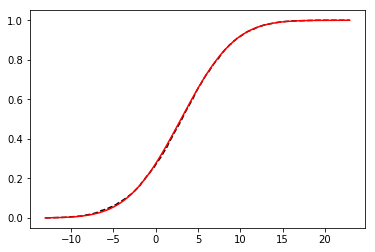

In [15]:
plt.plot(x, elnorm.ecdf(x), 'k--')
plt.plot(x, xv.cdf(x), 'r')

MSE of empirical CDF and EL CDF

In [16]:
np.sum((elnorm.ecdf(x)-xv.cdf(x))**2)

0.12545088780698183

In [17]:
np.sum((dcdf(x,x)-xv.cdf(x))**2)

0.12540999631349692

# Compare to GMM

In [25]:
elnorm.gmm_estimate([0,4])

11.3961101698
0.0718869471109
0.00210113402286
0.000115781826993
5.59133123953e-06
2.42969189849e-07


In [26]:
elnorm.estim

 final_simplex: (array([[ 3.14457975,  4.70803185],
       [ 3.14450472,  4.70807401],
       [ 3.14462671,  4.70806427]]), array([ 0.01592248,  0.01592248,  0.01592248]))
           fun: 0.015922483709145466
       message: 'Optimization terminated successfully.'
          nfev: 51
           nit: 26
        status: 0
       success: True
             x: array([ 3.14457975,  4.70803185])

In [27]:
theta_gmm = elnorm.theta

In [28]:
elnorm.lagrange_step(elnorm.theta)

In [29]:
elnorm.ltol

6.7157552973963926e-12

# Compare two methods

In [30]:
(theta_gmm - [3,5])/[3,5]

array([ 0.04819325, -0.05839363])

In [31]:
(theta_gel - [3,5])/[3,5]

array([ 0.02167954, -0.0580284 ])